## Import modules

In [2]:
import numpy as np
import os
from numpy import linalg as LA
import librosa
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras import backend as K
import pandas as pd
import cv2
from PIL import Image
import time
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
#from pylab import *
import math

/Users/jaejinan/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Reading models and calling parameters

In [44]:
model_exam = Sequential()

In [45]:
from keras.models import model_from_json, model_from_yaml
#Calling models saved in JSON format
json_string = open('./sound5.json', 'r').read()
model_exam = model_from_json(json_string)
model_exam.load_weights('./sound5.hdf5')

In [46]:
from keras.optimizers import SGD, Adadelta, Adam, RMSprop

model_exam.compile(loss="categorical_crossentropy", # 誤差(損失)関数
             optimizer="adam", # 最適化関数
             metrics=["accuracy"] # 評価指標
             )

## Load row datas

In [49]:
print(os.listdir("./BillData/"))

['疲弊LV-4', '疲弊LV-3', '疲弊LV-2', '疲弊LV-0', '疲弊LV-1']


In [13]:
data_arr = []
levels=os.listdir("./exam/")
for a in levels:
    try:
        if (not a.startswith('.') and not a.startswith('i')):
            num_arr = []
            path_to_file = os.path.join("./exam/"+a)
            fd = open(path_to_file , 'r')
            while True:
                string = fd.readline()
                if not string: break
                data_arr.append(float(string[:-1]))
            fd.close()
    except AttributeError:
        print("")
        
#data_arr[level_num][file_num][numbers]
#level_num : 0~4(5 classes)
#file_num : 0~79(20*4 files)
#numbers : 0~8799(8800 amplitudes)

['wavedata_S03DF_6', 'image']


In [14]:
Datas=np.array(data_arr)

## Graph Division5

In [16]:
for c in range(0,5):
    fig = plt.figure()
    plt.plot(Datas[550*c:550*c+6599],antialiased=False,color='black',linewidth=0.5)
    plt.axis([0,6600,-1,1])
    plt.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
    plt.tick_params(bottom=False,left=False,right=False,top=False)
    plt.box(False)
    plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
    plt.savefig('./exam/image/'+str(c+1)+'.png')
    plt.close(fig)

## Import and save images

In [20]:
data = []
levels=os.listdir("./exam/image")
for a in levels:
    try:
        if not a.startswith('.'):
            print(a)
            path_to_file = os.path.join("./exam/image/"+a)
            image=cv2.imread(path_to_file)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image_from_array = Image.fromarray(gray)
            data.append(np.array(image_from_array))
    except AttributeError:
        print("")

4.png
5.png
2.png
3.png
1.png


In [22]:
Exam=np.array(data)

## Data preprocessing

In [32]:
x_exam = Exam.astype('float32')/255

In [42]:
#preparing label name
label = np.array([
    'Lv4',
    'Lv3',
    'Lv2',
    'Lv0',
    'Lv1'])

In [43]:
img_rows, img_cols = 288,432
img_channels = 1
# Adjustment of input type of dimension number due to difference of backend

if K.image_data_format() == 'channels_first':
    x_exam = x_exam.reshape(x_exam.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_exam = x_exam.reshape(x_exam.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

## Predictive visualization

In [47]:
Y_exam_pred = model_exam.predict(x_exam)

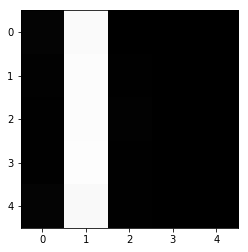

In [56]:
#Predictive visualization
#Numerals of images passed by Y axis, and X axis is estimated by neural network

plt.imshow(Y_exam_pred[:5], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
#plt.savefig("save.pdf")

In [54]:
print("pred:",label[np.argmax(Y_exam_pred[0]+Y_exam_pred[1]+Y_exam_pred[2]+Y_exam_pred[3]+Y_exam_pred[4])])

pred: Lv3
